In [1]:
from libraries import lib
import qutip as qt
import torch.nn as nn 
import torch
import numpy as np
import matplotlib.pyplot as plt
from kan import *

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [3]:
N = 2
J = 1
Gamma = 1

In [4]:
lib.TFIM_hamiltonian(N, J, Gamma).eigenstates()

(array([-2.82842712, -2.        ,  2.        ,  2.82842712]),
 array([Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
        Qobj data =
        [[0.65328148]
         [0.27059805]
         [0.27059805]
         [0.65328148]]                                                              ,
        Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
        Qobj data =
        [[-7.07106781e-01]
         [-3.92523115e-17]
         [-1.96261557e-16]
         [ 7.07106781e-01]]                                                         ,
        Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
        Qobj data =
        [[ 0.00000000e+00]
         [-7.07106781e-01]
         [ 7.07106781e-01]
         [ 4.44089210e-16]]                                                         ,
        Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
        Qobj data =
        [[ 0.27059805]
         

In [5]:
input = lib.generate_input_torch(N)
def amp_phase(nn_output):
    return nn_output[:, 0] * torch.exp(1.j * 2 * np.pi * nn_output[:, 1])

In [6]:
model = KAN(width=[N, 5 * N, 2], device=device)

checkpoint directory created: ./model
saving model version 0.0


In [7]:
vars = (N, J, Gamma)
loss_fn = lib.TFIM_expectation_from_torch
epochs = []
loss_data = []
# optimizer = torch.optim.SGD(model.parameters(), lr = 2) # this did not work
optimizer = LBFGS(model.parameters(), lr=1, history_size=10, line_search_fn="strong_wolfe", tolerance_grad=1e-32, tolerance_change=1e-32, tolerance_ys=1e-32)
for epoch in range(50):
    def closure():
        optimizer.zero_grad()
        loss = loss_fn(model(input), vars, amp_phase)
        loss.backward()
        return loss

    optimizer.step(closure)
    # if epoch % 100 == 0:
    #     loss_data.append(loss.item())
    #     epochs.append(epoch)

# find groud state
gs = lib.model_to_ground_state(model, input, amp_phase)

In [8]:
[n for n in model.parameters()]

[Parameter containing:
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 Parameter containing:
 tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 Parameter containing:
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 Parameter containing:
 tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 Parameter containing:
 tensor([0., 0.]),
 Parameter containing:
 tensor([1., 1.]),
 Parameter containing:
 tensor([0., 0.]),
 Parameter containing:
 tensor([1., 1.]),
 Parameter containing:
 tensor([[-3.0000, -2.3333, -1.6667, -1.0000, -0.3333,  0.3333,  1.0000,  1.6667,
           2.3333,  3.0000],
         [-3.0000, -2.3333, -1.6667, -1.0000, -0.3333,  0.3333,  1.0000,  1.6667,
           2.3333,  3.0000]]),
 Parameter containing:
 tensor([[[ 0.0207,  0.0504, -0.0654,  0.1182, -0.0340, -0.0190],
          [-0.0054, -0.0284, -0.1247, -0.0952,  0.2001,  0.0543],
          [ 0.0003, -0.0103, -0.0633,  0.0201,  0.0486,  0.0088],
          [ 0.0139,  0.0420, -0.0452, -0.0130,  0.0434,  0.0114],
  

In [9]:
gs.full()

array([[0.65327883+0.00187509j],
       [0.27059695+0.00077667j],
       [0.27059695+0.00077665j],
       [0.65327877+0.001875j  ]])

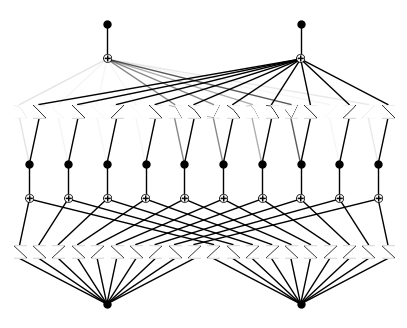

In [10]:
model.plot()

saving model version 0.1


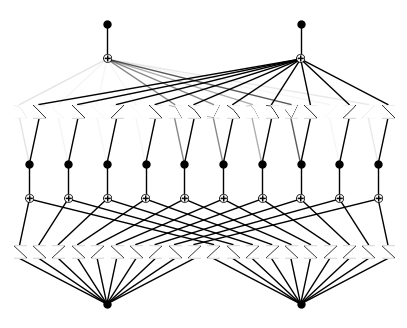

In [11]:
model = model.prune_node(threshold = 1e-2)
model.plot()

(array([-0.32670423, -0.14631934,  0.02022148,  0.20060638], dtype=float32),
 array([ 0.00750011,  0.00090554, -0.00602924, -0.01318721], dtype=float32))

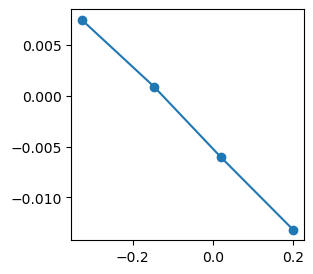

In [12]:
model.get_fun(1, 0, 1)

In [13]:
model.auto_symbolic(r2_threshold=0.9)

fixing (0,0,0) with x, r2=0.9999918937683105, c=1
fixing (0,0,1) with 1/x^2, r2=1.0000003576278687, c=2
fixing (0,0,2) with x, r2=0.9998862743377686, c=1
fixing (0,0,3) with 1/x, r2=1.000000238418579, c=2
fixing (0,0,4) with x, r2=0.9999942779541016, c=1
fixing (0,0,5) with x, r2=0.999995231628418, c=1
fixing (0,0,6) with x, r2=0.999995768070221, c=1
fixing (0,0,7) with x, r2=0.999997079372406, c=1
fixing (0,0,8) with exp, r2=1.0000003576278687, c=2
fixing (0,0,9) with x, r2=0.9999606013298035, c=1
fixing (0,1,0) with x, r2=0.9999695420265198, c=1
fixing (0,1,1) with x, r2=0.9999838471412659, c=1
fixing (0,1,2) with 1/x, r2=1.000000238418579, c=2
fixing (0,1,3) with x, r2=0.9998815655708313, c=1
fixing (0,1,4) with x, r2=0.9999938011169434, c=1
fixing (0,1,5) with x, r2=0.9999942779541016, c=1
fixing (0,1,6) with x, r2=0.99998539686203, c=1
fixing (0,1,7) with x, r2=0.9999961256980896, c=1
fixing (0,1,8) with x, r2=0.9999806880950928, c=1
fixing (0,1,9) with 1/x, r2=1.0000003576278687,

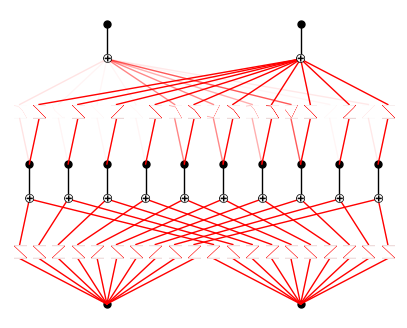

In [14]:
model.plot()

In [15]:
for epoch in range(50):
    def closure():
        optimizer.zero_grad()
        loss = loss_fn(model(input), vars, amp_phase)
        loss.backward()
        return loss

    optimizer.step(closure)

In [16]:
loss_fn(model(input), vars, amp_phase).item()

-2.82841420173645

In [17]:
gs = lib.model_to_ground_state(model, input, amp_phase)

In [18]:
gs

Quantum object: dims=[[4], [1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.6551559 +0.00253574j]
 [0.27136904+0.00074878j]
 [0.27008554+0.00102977j]
 [0.65128702+0.0006764j ]]

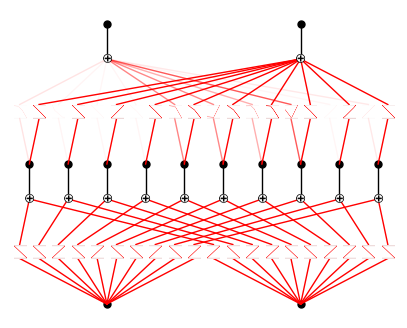

In [19]:
model.plot()

In [20]:
model = model.prune()

saving model version 0.3


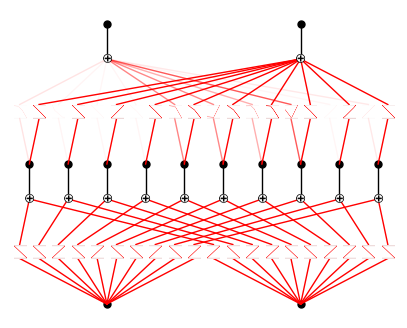

In [21]:
model.plot()

In [22]:
formula = model.symbolic_formula()
print('amp=')
nsimplify(ex_round(formula[0][0], 2))

amp=


7*(-x_1 - 9*x_2/10 + 21/25)**2/50 - (-x_1 + 50*x_2/51 - 16/25)**2/25 + 3*(57*x_1/77 + 2*x_2/3 - 1)**2/25 - 13*(x_1 - 11*x_2/20 - 7/10)**2/261 - 10*(x_1 - 40*x_2/77 - 23/25)**2/999 - 20*exp(10*x_1/37)/999 - 20*exp(21*x_2/100)/999 + 20*exp(-2*x_2/5 + 4*exp(-63*x_1/20)/57)/999 + 11/25 - 10*exp(-3*x_1/25)/77

In [23]:
print('phase=')
nsimplify(ex_round(formula[0][1], 2))

phase=


-2*exp(10*x_1/77)/25 + 9*exp(2*x_1/25)/53 - 2*exp(11*x_2/100)/25 - 8*exp(-3*x_1/5 - 27*x_2/50)/89 - 9*exp(-2*x_1/25 + x_2/25)/50 - 7*exp(7*x_1/50 + 10*x_2/77)/25 - exp(11*x_1/20 - 27*x_2/50)/25 + 3*exp(-16*x_2/41 + 4*exp(-63*x_1/20)/57)/100 + 20/23 - 9*exp(-13*x_2/261)/29

In [24]:
model = KAN(width=[2, 1, 2], device=device) # does not work with just [2, 2]

checkpoint directory created: ./model
saving model version 0.0


In [25]:
loss_fn(model(input), vars, amp_phase)

tensor(1.2833, grad_fn=<DivBackward0>)

In [26]:
epochs = []
loss_data = []
optimizer = LBFGS(model.parameters(), lr=1, history_size=10, line_search_fn="strong_wolfe", tolerance_grad=1e-32, tolerance_change=1e-32, tolerance_ys=1e-32)
for epoch in range(50):
    def closure():
        optimizer.zero_grad()
        loss = loss_fn(model(input), vars, amp_phase)
        loss.backward()
        return loss

    optimizer.step(closure)
    epochs.append(epoch)
    loss_data.append(loss_fn(model(input), vars, amp_phase).item())

# find groud state
gs = lib.model_to_ground_state(model, input, amp_phase)

In [27]:
calced = loss_data[-1]
actual = lib.TFIM_hamiltonian(N, J, Gamma).eigenstates()[0][0]
print(calced)
print(actual)
print((calced - actual)**2)

-2.8284270763397217
-2.82842712474619
2.343186160419488e-15


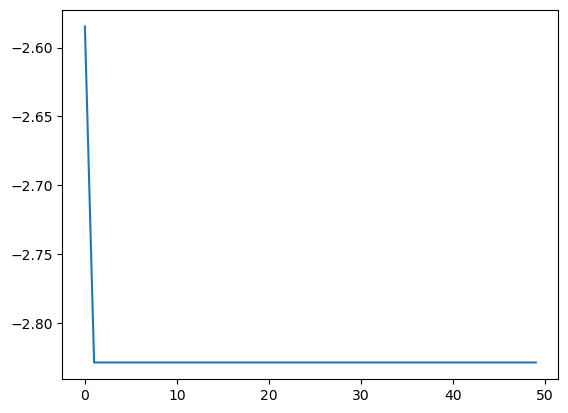

In [28]:
plt.plot(epochs, loss_data)
plt.show()

In [29]:
actual = lib.TFIM_hamiltonian(N, J, Gamma).eigenstates()[1][0]
print(gs)
print(actual)
print(qt.fidelity(gs, actual))

Quantum object: dims=[[4], [1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[-0.63512659-0.15280102j]
 [-0.26306701-0.06328181j]
 [-0.26318061-0.06329639j]
 [-0.63514048-0.15291564j]]
Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.65328148]
 [0.27059805]
 [0.27059805]
 [0.65328148]]
0.9999999242709166


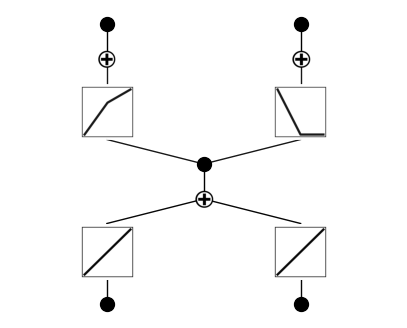

In [30]:
model.plot()

saving model version 0.1


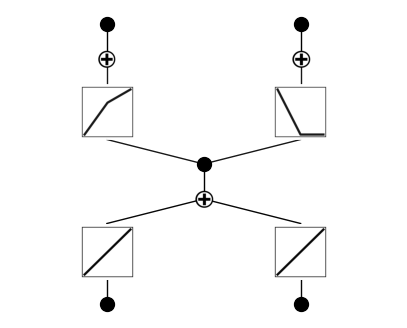

In [31]:
model = model.prune()
model.plot()

In [32]:
model.auto_symbolic(r2_threshold=0.99)

fixing (0,0,0) with x, r2=0.9999962449073792, c=1
fixing (0,1,0) with x, r2=0.9999962449073792, c=1
fixing (1,0,0) with x^2, r2=1.000000238418579, c=2
fixing (1,0,1) with 1/x^2, r2=1.0000003576278687, c=2
saving model version 0.2


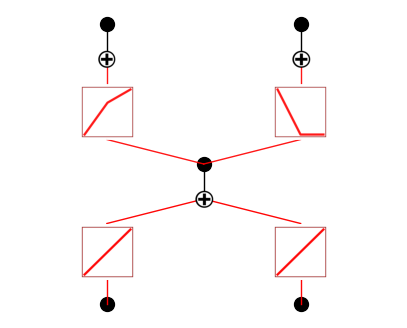

In [33]:
model.plot()

In [34]:
for epoch in range(50):
    def closure():
        optimizer.zero_grad()
        loss = loss_fn(model(input), vars, amp_phase)
        loss.backward()
        return loss

    optimizer.step(closure)
    epochs.append(epoch)
    loss_data.append(loss_fn(model(input), vars, amp_phase).item())

# find groud state
gs = lib.model_to_ground_state(model, input, amp_phase)

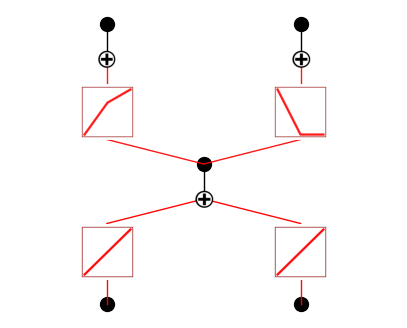

In [35]:
model.plot()

(array([0.38236645, 0.8817272 , 0.88178605, 1.3811469 ], dtype=float32),
 array([-0.9624454, -1.4624193, -1.4624193, -1.4624231], dtype=float32))

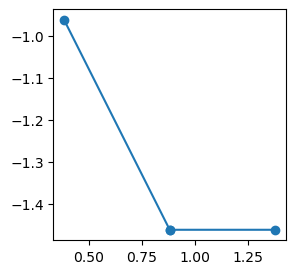

In [36]:
model.get_fun(1, 0, 1)

(array([0.38236645, 0.8817272 , 0.88178605, 1.3811469 ], dtype=float32),
 array([-1.6932425 ,  0.70151186,  0.7017114 ,  1.6929916 ], dtype=float32))

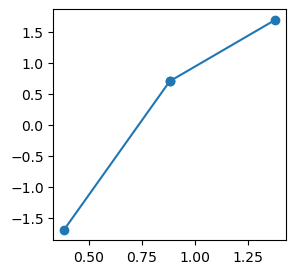

In [37]:
model.get_fun(1, 0, 0)

In [38]:
calced = loss_data[-1]
actual = lib.TFIM_hamiltonian(N, J, Gamma).eigenstates()[0][0]
print(calced)
print(actual)
print((calced - actual)**2)

-2.8284268379211426
-2.82842712474619
8.226860774071208e-14


In [39]:
actual = lib.TFIM_hamiltonian(N, J, Gamma).eigenstates()[1][0]
print(gs)
print(actual)
print(qt.fidelity(gs, actual))

Quantum object: dims=[[4], [1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[-0.6351862 -0.15272532j]
 [-0.2631478 -0.06331743j]
 [-0.26322266-0.06333545j]
 [-0.63507074-0.1527912j ]]
Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.65328148]
 [0.27059805]
 [0.27059805]
 [0.65328148]]
0.9999999510838914


In [40]:
model.symbolic_formula()

([1.72287917137146 - 3.41612128634918*(-0.45320537193972*x_1 - 0.453258660557865*x_2 + 1)**2,
  -1.46242427825928 + 4.92648307590634e-6/(-0.999882432211932*x_1 - x_2 + 0.00313892449303052)**2],
 [x_1, x_2])

In [41]:
formula = model.symbolic_formula()
print('amp=')
nsimplify(ex_round(formula[0][0], 4))

amp=


17229/10000 - 34161*(-1133*x_1/2500 - 4533*x_2/10000 + 1)**2/10000

In [42]:
print('phase=')
nsimplify(ex_round(formula[0][1], 4))

phase=


11/4 - 3*sqrt(3817)/44

In [43]:
model = KAN(width=[2, 2, 2], device=device) # does not work with just [2, 2]

checkpoint directory created: ./model
saving model version 0.0


In [44]:
epochs = []
loss_data = []
optimizer = LBFGS(model.parameters(), lr=1, history_size=10, line_search_fn="strong_wolfe", tolerance_grad=1e-32, tolerance_change=1e-32, tolerance_ys=1e-32)
for epoch in range(50):
    def closure():
        optimizer.zero_grad()
        loss = loss_fn(model(input), vars, amp_phase)
        loss.backward()
        return loss

    optimizer.step(closure)
    epochs.append(epoch)
    loss_data.append(loss_fn(model(input), vars, amp_phase).item())

# find groud state
gs = lib.model_to_ground_state(model, input, amp_phase)

In [45]:
calced = loss_data[-1]
actual = lib.TFIM_hamiltonian(N, J, Gamma).eigenstates()[0][0]
print(calced)
print(actual)
print((calced - actual)**2)

-2.828427314758301
-2.82842712474619
3.6104602301742916e-14


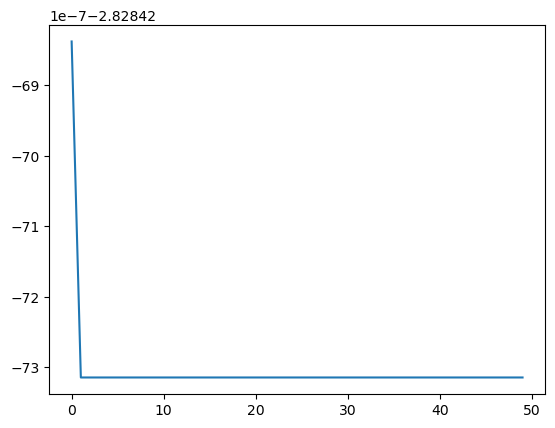

In [46]:
plt.plot(epochs, loss_data)
plt.show()

In [47]:
actual = lib.TFIM_hamiltonian(N, J, Gamma).eigenstates()[1][0]
print(gs)
print(actual)
print(qt.fidelity(gs, actual))

Quantum object: dims=[[4], [1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.64998031+0.06563186j]
 [0.26922432+0.02719541j]
 [0.26923415+0.02718002j]
 [0.64997149+0.06563593j]]
Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.65328148]
 [0.27059805]
 [0.27059805]
 [0.65328148]]
1.0000000249938634


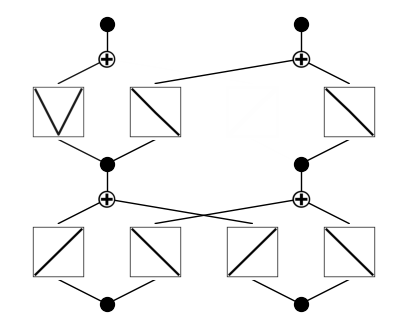

In [48]:
model.plot()

saving model version 0.1


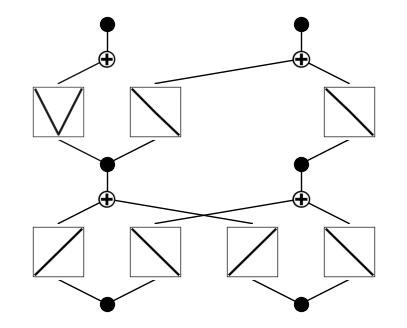

In [49]:
model = model.prune()
model.plot()

In [50]:
model.auto_symbolic(r2_threshold=0.99)

fixing (0,0,0) with x, r2=0.999994695186615, c=1
fixing (0,0,1) with exp, r2=1.0000003576278687, c=2
fixing (0,1,0) with x, r2=0.9999945759773254, c=1
fixing (0,1,1) with exp, r2=1.0000003576278687, c=2
fixing (1,0,0) with 1/x^2, r2=0.9999988675117493, c=2
fixing (1,0,1) with 1/x^2, r2=0.9999527931213379, c=2
fixing (1,1,0) with 0
fixing (1,1,1) with exp, r2=0.9999707937240601, c=2
saving model version 0.2


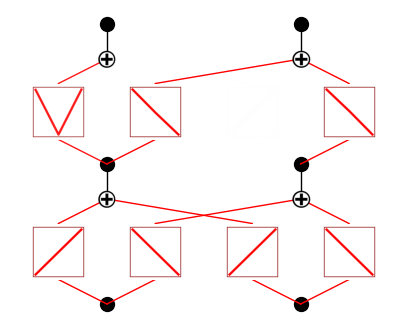

In [51]:
model.plot()

In [52]:
for epoch in range(50):
    def closure():
        optimizer.zero_grad()
        loss = loss_fn(model(input), vars, amp_phase)
        loss.backward()
        return loss

    optimizer.step(closure)
    epochs.append(epoch)
    loss_data.append(loss_fn(model(input), vars, amp_phase).item())

# find groud state
gs = lib.model_to_ground_state(model, input, amp_phase)

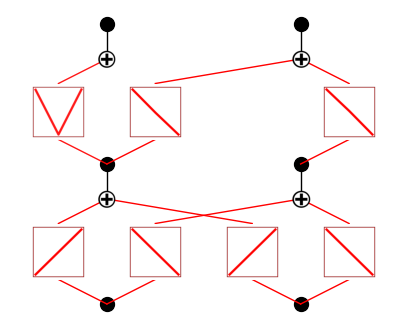

In [53]:
model.plot()

(array([-0.1797154 ,  0.23933646,  0.23937428,  0.65842617], dtype=float32),
 array([ 0.12154584, -0.02464911, -0.02440554,  0.12235326], dtype=float32))

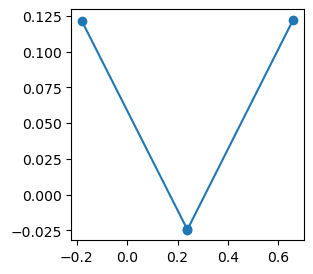

In [61]:
model.get_fun(1, 0, 0)

tuple

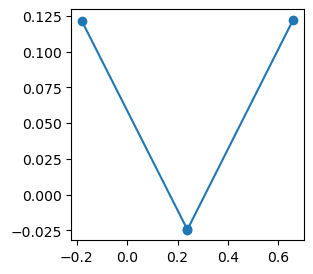

In [ ]:
model.get_fun(1, 0, 0)

In [54]:
calced = loss_data[-1]
actual = lib.TFIM_hamiltonian(N, J, Gamma).eigenstates()[0][0]
print(calced)
print(actual)
print((calced - actual)**2)

-2.8284239768981934
-2.82842712474619
9.908947008990273e-12


In [55]:
actual = lib.TFIM_hamiltonian(N, J, Gamma).eigenstates()[1][0]
print(gs)
print(actual)
print(qt.fidelity(gs, actual))

Quantum object: dims=[[4], [1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.64893264+0.0655248j ]
 [0.26889548+0.02716287j]
 [0.2695303 +0.02721033j]
 [0.65103102+0.06574158j]]
Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.65328148]
 [0.27059805]
 [0.27059805]
 [0.65328148]]
0.9999987799807524


In [56]:
model.symbolic_formula()

([0.251898288726807 - 0.00179209406473648/(-0.999909865415265*x_1 - x_2 + 0.890039687290799)**2,
  -0.00744290465400226*exp(-0.000181239487259972*exp(5.94487953186035*x_1) - 0.000161441930930364*exp(6.04016017913818*x_2)) + 0.0235315132886171 - 7.50596520814784e-5/(-0.635327504862895*x_1 - 0.635384775005737*x_2 + 1)**2],
 [x_1, x_2])

In [59]:
formula = model.symbolic_formula()
print('amp=')
nsimplify(ex_round(formula[0][0], 3))

amp=


125/496 - 2/(993*(-x_1 - x_2 + 615/691)**2)

In [60]:
print('phase=')
nsimplify(ex_round(formula[0][1], 2))

phase=


2/195